## اضافه کردن کتابخانه‌های مورد نیاز

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## خواندن داده
فایل‌های `boys.csv` و `girls.csv` که داخل همین پوشه قرار دارند را بخوانید.
- دقت کنید برای جداسازی مقادیر در این فایل‌ها به جای `,` از `tab` استفاده شده است.
- در داده‌ها روز ۰ وجود دارد که منظور هنگام به دنیا آمدن نوزاد است.

In [73]:
girls_df = pd.read_csv('girls.csv',delimiter = '\t')
boys_df = pd.read_csv('boys.csv',delimiter = '\t')
boys_df.loc[1500]

Day     1500.00000
L          1.00000
M        104.04600
S          0.04077
P01       90.93700
P1        94.17800
P3        96.06800
P5        97.06900
P10       98.61000
P15       99.64900
P25      101.18500
P50      104.04600
P75      106.90700
P85      108.44300
P90      109.48200
P95      111.02300
P97      112.02400
P99      113.91400
P999     117.15500
Name: 1500, dtype: float64

در هر دو دیتافریم شامل اطلاعات پسران و دختران، دو ستون با نام‌های `P01` و `P999` قرار دارند که نشان دهنده هزارک اول و آخر هستند.
اما در اینجا ما با صدک‌ها سر و کار داریم بنابراین برای هماهنگی با بقیه ستون‌ها این دو ستون را به ترتیب به
`P0.1`
و
`P99.9`
تغییر نام دهید.

In [65]:
girls_df = girls_df.rename(columns = {'P01':'P0.1','P999':'P99.9'})
boys_df = boys_df.rename(columns = {'P01':'P0.1','P999':'P99.9'})
y_girls_df = girls_df
y_boys_df = boys_df
y_girls_df['Day'] = girls_df['Day']/365
y_boys_df['Day'] = boys_df['Day']/365

## تصویرسازی
نمودار صدک‌های **قد(به سانتی‌متر)** بر حسب **سن(به سال)** را رسم کنید. نمودار شما باید چیزی شبیه به نمو‌دار زیر شود.
- در داده‌ها سن به روز محاسبه شده و باید آن را تبدیل به سال کنید تا مقیاس نمودار صحیح شود.
- فقط ستون‌هایی که اسمشان با `P` شروع می‌شود نشان دهنده صدک‌ها هستند.
- برای هر کدام از صدک‌ها می‌توانید یک نمودار نقطه‌ای بکشید و رنگش را بر حسب فاصله‌ی آن از میانه تغییر دهید.
- به شکل زیر می‌توان از `colormap` های کتابخانه‌ی `matplotlib` برای تولید طیف رنگ مورد نیاز برای نمودار این قسمت استفاده کرد.
```python
colors = plt.cm.RdYlGn_r(np.abs(np.linspace(-1, 1, 15)))
```

Text(0.5, 1.0, 'Height by Age percentiles')

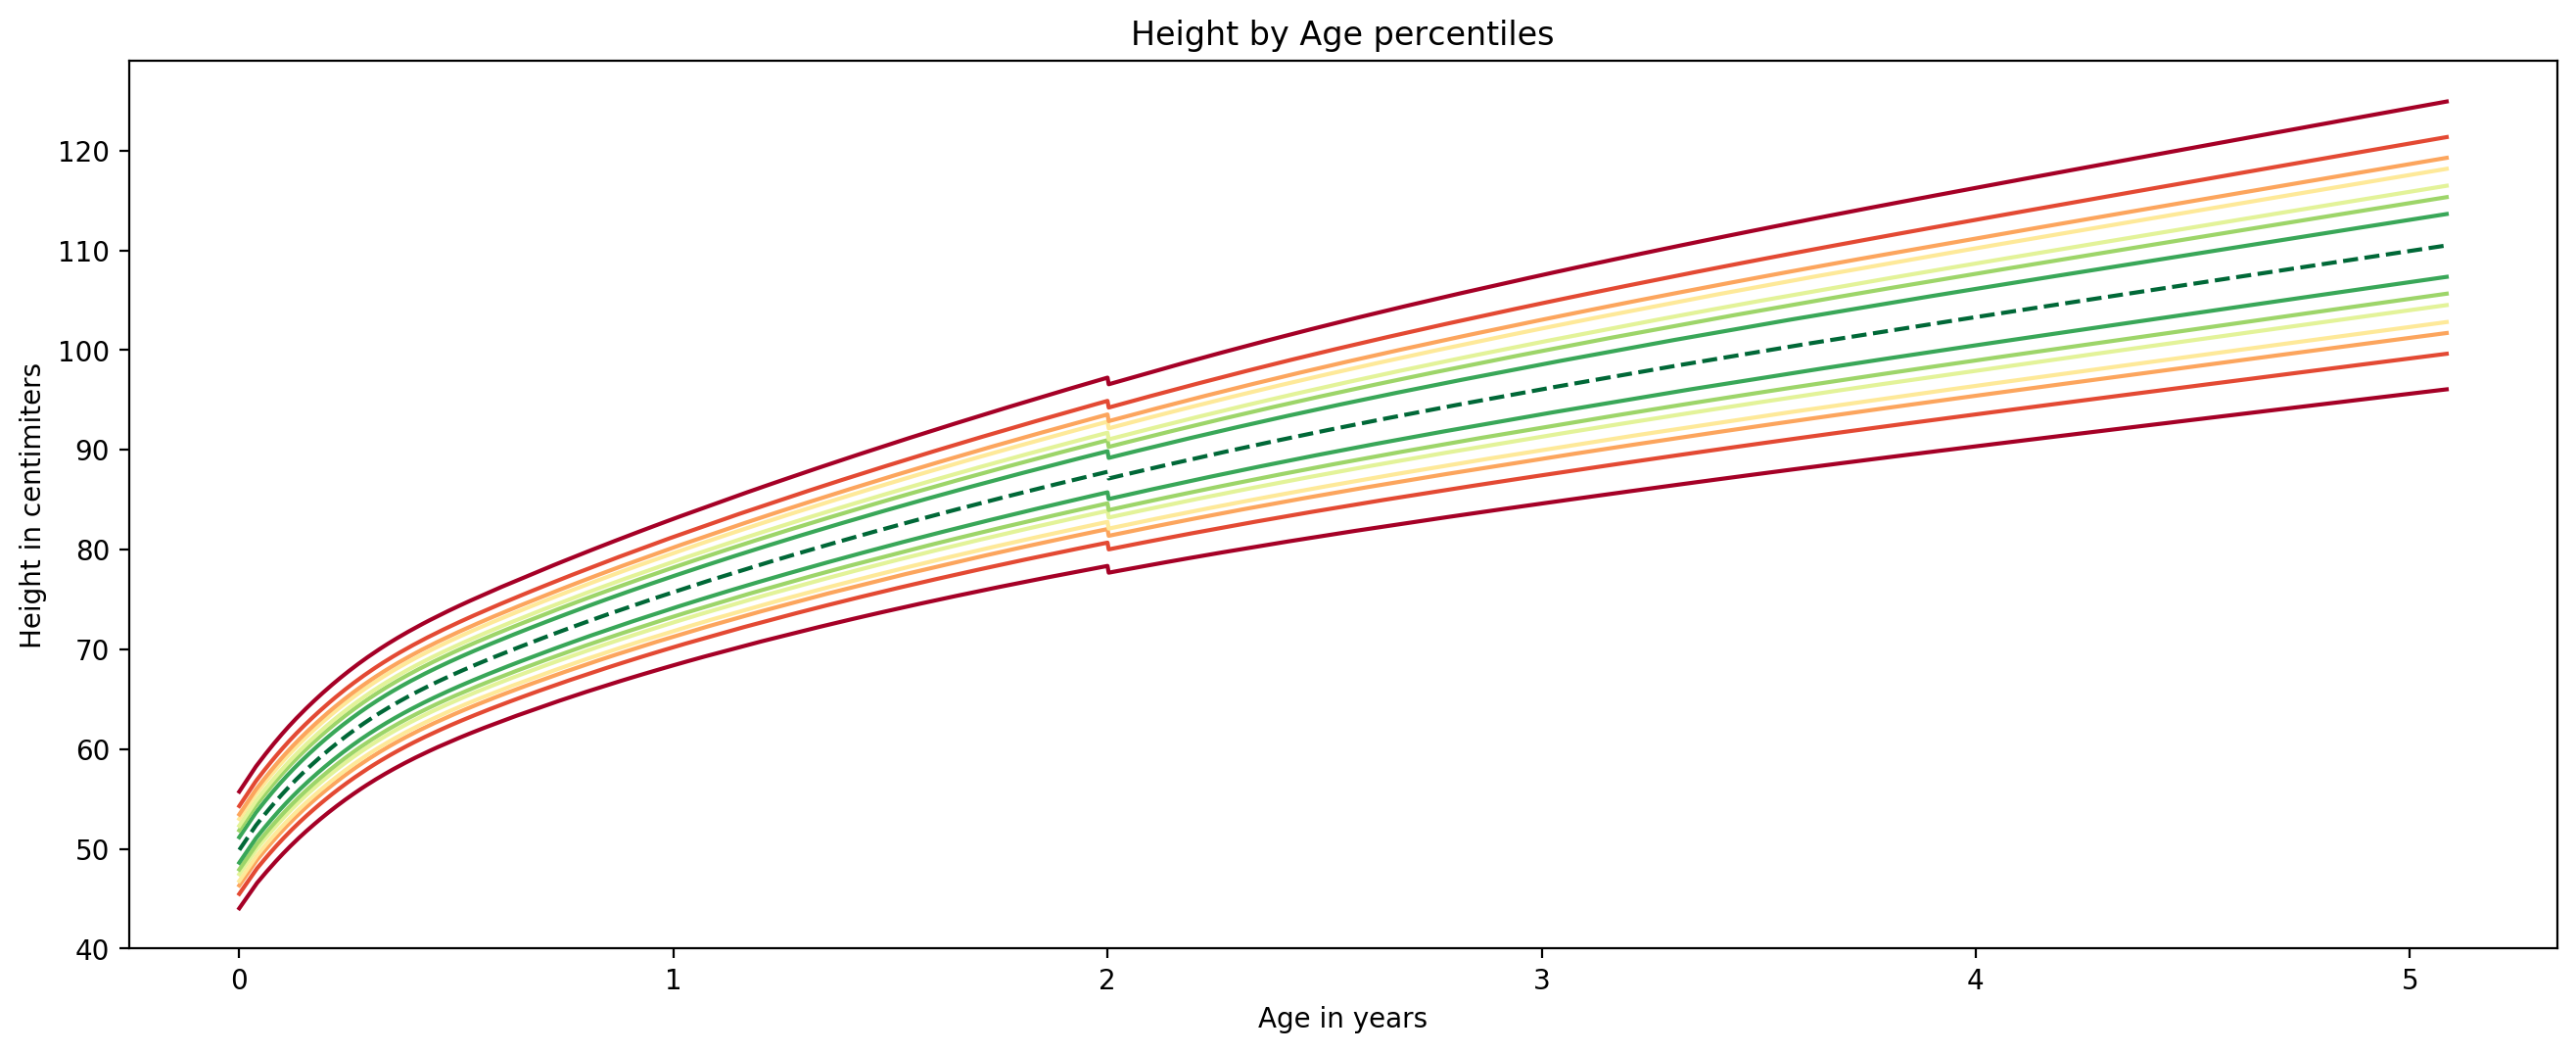

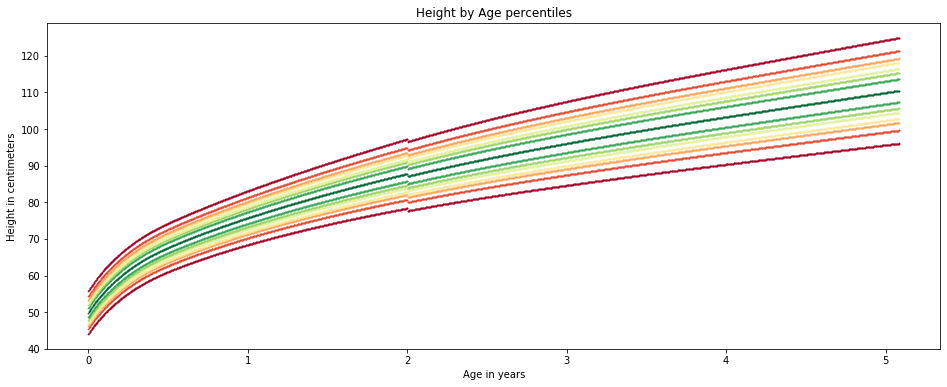

In [66]:
quantiles = y_boys_df.iloc[:, 4:20]
colors = plt.cm.RdYlGn_r(np.abs(np.linspace(-1, 1, 15)))
plt.figure(figsize = (16,6))
plt.title('Height by Age percentiles')
for i in range(quantiles.shape[1]):
    plt.scatter(y_boys_df.Day,quantiles.iloc[:,i],color = colors[i], s = 0.5)
plt.xlabel('Age in years')
plt.ylabel('Height in centimeters')
plt.show()

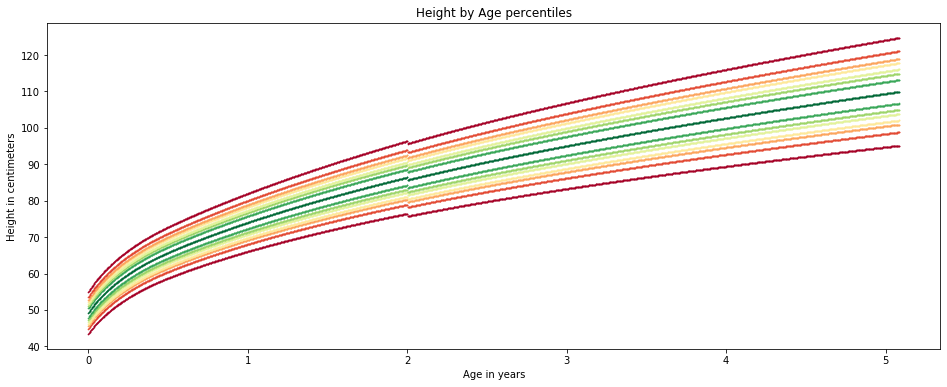

In [67]:
quantiles = y_girls_df.iloc[:, 4:20]
colors = plt.cm.RdYlGn_r(np.abs(np.linspace(-1, 1, 15)))
plt.figure(figsize = (16,6))
plt.title('Height by Age percentiles')
for i in range(quantiles.shape[1]):
    plt.scatter(y_girls_df.Day,quantiles.iloc[:,i],color = colors[i], s = 0.5)
plt.xlabel('Age in years')
plt.ylabel('Height in centimeters')
plt.show()

تابع `is_normal` را مانند شکل زیر تکمیل کنید تا در صورت طبیعی بودن وضعیت قد یک کودک `True` و در غیر این‌صورت `False` برگرداند.
- `boys_df` و `girls_df` داده‌های قرار داده‌شده در کنار سوال هستند. که در ابتدای این نوت‌بوک خواندید.
- در صورتی وضعیت قد طبیعی است که بیشتر یا مساوی صدک ۱۵ ام و کمتر از صدک ۸۵ ام باشد.
- `gender` مقداری برابر با `male` یا `female` دارد.
- پس از تکمیل تابع آن را در فایل `functions.py` ذخیره کنید. می‌توانید این کار را با قرار دادن مجیک `%%writefile functions.py` در خط اول سلول انجام دهید.

In [70]:
def is_normal(boys_df,girls_df,age_in_days,height_in_cm,gender):
    if gender =='male':
        findRow = boys_df.loc[age_in_days]
        if height_in_cm >= findRow['P15'] and height_in_cm < findRow['P85']:
            return True
        else:
            return False
    else:
        findRow = girls_df.loc[age_in_days]
        if height_in_cm >= findRow['P15'] and height_in_cm < findRow['P85']:
            return True
        else:
            return False

برای تست کردن تابع خود می‌توانید خطوط زیر را اجرا کنید.

In [71]:
assert is_normal(boys_df,girls_df,1500,108.442,'male')

In [72]:
assert is_normal(boys_df,girls_df,1500,108.443,'male') == False